**Image Classificaiton on Fashion Mnist dataset**

IMPORT KERAS

In [0]:
import keras


Using TensorFlow backend.


**Load Fashion Mnist Data**: This is animage dataset that consists of 10 different categories of fashion accessoires such as shirts,pants,shoes etc

In [0]:
from keras.datasets import  fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() 



4423680/4422102 [==============================] - 1s 0us/step


In [0]:
train_images.shape
#test_images.shape
#test_labels.shape

(60000, 28, 28)

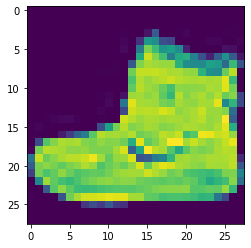

In [0]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show()

In [0]:
print(train_labels[0])

9


Building Neural Network

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
#network.add(layers.Dense(10, activation='softmax',  input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Compiling the Neural Network

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Reshaping the Training and testing images so that it matches with the Neural Network

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Converting the labels to categorical variables

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Training the Model

In [0]:
hist  =network.fit(train_images, train_labels, epochs=50, batch_size=512)
history = hist.history

Epoch 1/50
60000/60000 [==============================] - 1s 18us/step - loss: 0.7499 - accuracy: 0.7394
Epoch 2/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.5048 - accuracy: 0.8225
Epoch 3/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.4456 - accuracy: 0.8426
Epoch 4/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.4074 - accuracy: 0.8547
Epoch 5/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.3841 - accuracy: 0.8622
Epoch 6/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.3632 - accuracy: 0.8687
Epoch 7/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.3472 - accuracy: 0.8744
Epoch 8/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.3338 - accuracy: 0.8784
Epoch 9/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.3210 - accuracy: 0.8819
Epoch 10/50
60000/60000 [==============================

The Model has an accurcy of 94%

In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 27us/step


In [0]:
print('test_acc:', test_acc)

test_acc: 0.883400022983551


The model shows an accuracy of 88.6% on the testing set

In [0]:
predictions = network.predict(test_images)


In [0]:
predictions

array([[1.9860695e-09, 4.1135623e-10, 3.1354821e-12, ..., 3.7900633e-03,
        5.2253729e-10, 9.9610245e-01],
       [2.6480359e-04, 3.2939859e-13, 9.9943608e-01, ..., 2.4101012e-17,
        1.4862585e-11, 6.1475290e-11],
       [1.3669002e-08, 1.0000000e+00, 6.1194231e-12, ..., 4.3489181e-26,
        1.1975439e-12, 2.6323008e-21],
       ...,
       [4.4588171e-04, 5.9716473e-13, 8.0644631e-06, ..., 1.4686199e-06,
        9.9635988e-01, 3.1708105e-13],
       [3.5738331e-08, 9.9999547e-01, 3.0397780e-09, ..., 1.0100715e-14,
        1.9596899e-11, 1.2566092e-09],
       [5.4050524e-09, 6.3897880e-11, 9.6042454e-09, ..., 7.8608115e-05,
        1.7275611e-06, 3.9619728e-08]], dtype=float32)

Image Classification on happy-sad smiley dataset


In [0]:
!wget --no-check-certificate \
     "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" \
      -O "/tmp/happy-or-sad.zip"

--2020-04-26 19:45:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.01s   

2020-04-26 19:45:08 (193 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



Unzipping the data 

In [0]:
import os
import zipfile

local_zip = '/tmp/happy-or-sad.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

Creating Directoryies for the images

In [0]:
path = "/tmp/train"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)



In [0]:
import shutil

os.rename('/tmp/happy','/tmp/train/happy') #Move the file into train directory

os.rename('/tmp/sad','/tmp/train/sad') #Move the file into train directory


In [0]:
base_dir = '/tmp'

train_dir = os.path.join(base_dir,'train')


# Directory with our training cat/dog pictures
train_happy_dir = os.path.join(train_dir, 'happy')
train_sad_dir = os.path.join(train_dir, 'sad')




Loading the images

In [0]:
train_happy_fnames = os.listdir( train_happy_dir )
train_sad_fnames = os.listdir( train_sad_dir )

print(train_happy_fnames[:10])
print(train_sad_fnames[:10])

['happy1-08.png', 'happy2-05.png', 'happy1-09.png', 'happy1-14.png', 'happy2-14.png', 'happy1-13.png', 'happy2-17.png', 'happy1-04.png', 'happy1-10.png', 'happy1-00.png']
['sad2-09.png', 'sad2-03.png', 'sad2-02.png', 'sad1-02.png', 'sad1-10.png', 'sad1-17.png', 'sad1-09.png', 'sad2-12.png', 'sad1-14.png', 'sad1-15.png']


In [0]:
print('total happy images :', len(os.listdir(      train_happy_dir ) ))
print('total sad images :', len(os.listdir(      train_sad_dir ) ))

total happy images : 40
total sad images : 40


Configuring the matplot parameters:


In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

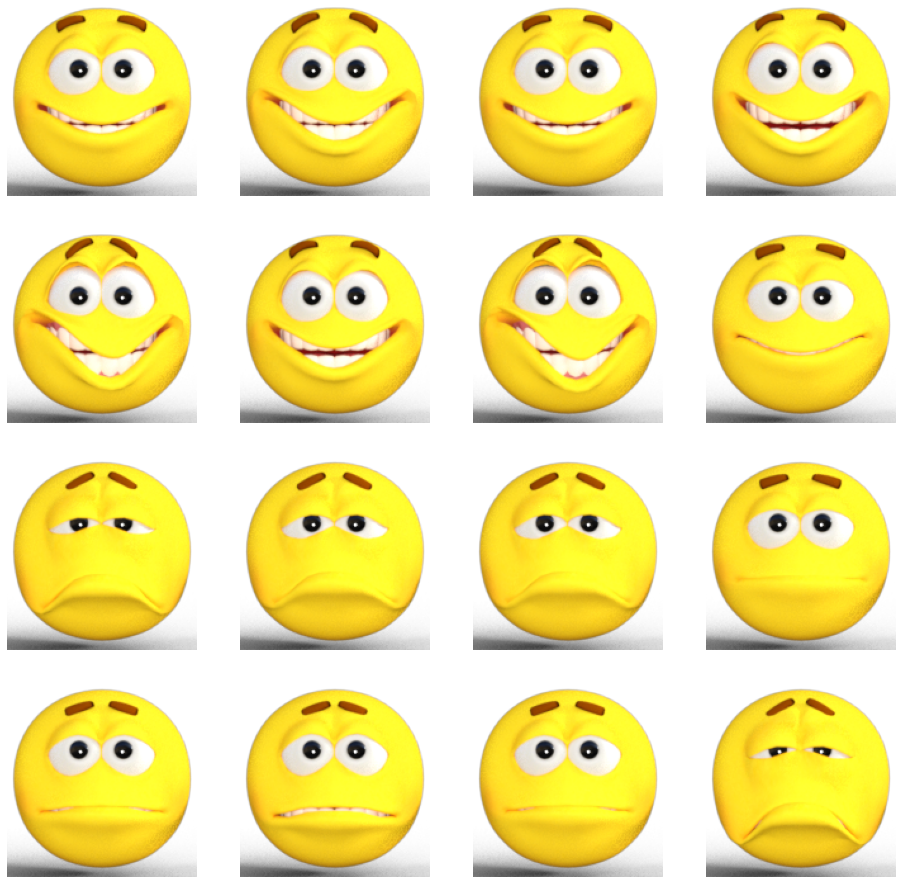

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_fnames[ pic_index-8:pic_index] 
               ]

next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Building The Model

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results into a one dimension data to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('happy') and 1 for the other ('sad')
    # Note that because we are facing a two-class classification problem, i.e. a binary classification problem, we will 
    # end our network with a sigmoid activation, so that the output of our network will be a single scalar between 0 and 1,
    # encoding the probability that the current image is class 1 (as opposed to class 0).
    tf.keras.layers.Dense(1, activation='sigmoid')  
])




In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), #learning rate of 0.001. In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us.
              loss='binary_crossentropy', #binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid.
              metrics = ['acc'])

Preprocessing the data to match the model paramaters

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
# Flow training images in batches of 20 using generator

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(300, 300))




Found 80 images belonging to 2 classes.


Training the Model

In [0]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=len(train_generator),
                              epochs=20, 
                              verbose=1)

Epoch 1/20
8/8 [==============================] - 8s 943ms/step - loss: 0.0597 - acc: 0.9875
Epoch 2/20
8/8 [==============================] - 8s 941ms/step - loss: 0.0121 - acc: 1.0000
Epoch 3/20
8/8 [==============================] - 8s 939ms/step - loss: 0.0016 - acc: 1.0000
Epoch 4/20
8/8 [==============================] - 7s 932ms/step - loss: 0.0015 - acc: 1.0000
Epoch 5/20
8/8 [==============================] - 8s 941ms/step - loss: 3.9686e-04 - acc: 1.0000
Epoch 6/20
8/8 [==============================] - 8s 947ms/step - loss: 5.2847e-04 - acc: 1.0000
Epoch 7/20
8/8 [==============================] - 8s 938ms/step - loss: 1.9229e-04 - acc: 1.0000
Epoch 8/20
8/8 [==============================] - 8s 938ms/step - loss: 0.0188 - acc: 0.9875
Epoch 9/20
8/8 [==============================] - 8s 938ms/step - loss: 0.1114 - acc: 0.9625
Epoch 10/20
8/8 [==============================] - 8s 941ms/step - loss: 1.0678e-04 - acc: 1.0000
Epoch 11/20
8/8 [==============================] - 8s

Text(0.5, 1.0, 'Training  loss')

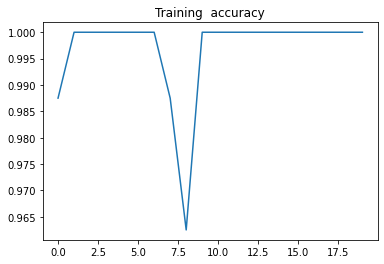

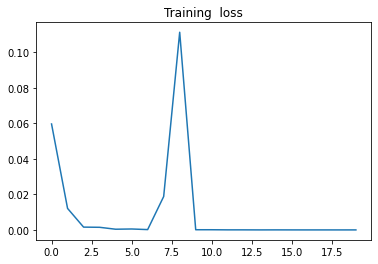

In [0]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'acc' ]
loss     = history.history[    'loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.title ('Training  accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.title ('Training  loss'   )

In [0]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(300, 300))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a happy face")
    
  else:
    print(fn + " is a sad face")
 

Saving happy1-01.png to happy1-01.png
Saving happy1-02.jpg to happy1-02.jpg
Saving happy1-03.png to happy1-03.png
Saving happy1-04.jpg to happy1-04.jpg
Saving happy1-05.png to happy1-05.png
Saving sad1-01.jpg to sad1-01.jpg
Saving sad1-02.jpg to sad1-02.jpg
Saving sad1-03.jpg to sad1-03.jpg
Saving sad1-04.jpg to sad1-04.jpg
Saving sad1-05.jpg to sad1-05.jpg
[1.]
happy1-01.png is a happy face
[1.]
happy1-02.jpg is a happy face
[1.]
happy1-03.png is a happy face
[1.]
happy1-04.jpg is a happy face
[1.]
happy1-05.png is a happy face
[0.]
sad1-01.jpg is a sad face
[1.]
sad1-02.jpg is a happy face
[1.]
sad1-03.jpg is a happy face
[0.]
sad1-04.jpg is a sad face
[0.]
sad1-05.jpg is a sad face


The Model is able to predict 8/10 images correctly.